In [1]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def draw_PR_curve(recall,precision,average_precision):
    """
    绘制PR曲线
    """
    step_kwargs = ({'step':'post'}
                  if 'step' in signature(plt.fill_between).parameters
                  else {})
    plt.step(recall,precision,color = 'b',alpha = 0.2, where = 'post')

    plt.fill_between(recall,precision,alpha = 0.2, color = 'b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
def draw_ROC (r,c,AUC):
    """
    绘制ROC图像
    """
    lw = 2
    plt.plot(r, c, color='darkorange',
             lw=lw, label='ROC curve (area = {0:0.2f})'.format(AUC))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fit Complete!
(50000,)
<class 'numpy.ndarray'>


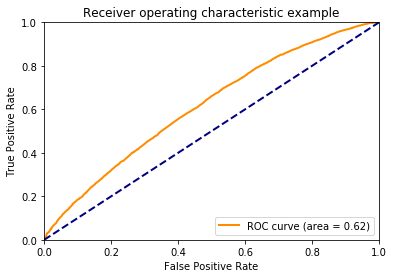

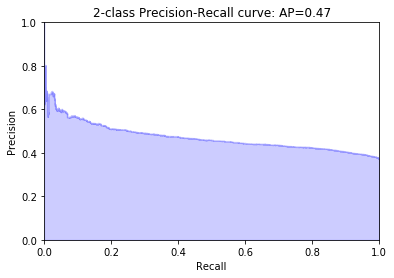

In [2]:
#baseline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/local_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/local_y.csv')

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':[200]}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.65      0.89      0.75     31415
          1       0.52      0.19      0.28     18585

avg / total       0.60      0.63      0.58     50000

confusion matrix:
[[28030  3385]
 [14990  3595]]


In [ ]:
#baseline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/local_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/local_y.csv')

#抽样

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':[200]}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [4]:
#随机取样10万样本做训练数据
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/train_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/local_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/local_y.csv')


data = X.join(y)
sample = data.sample(frac = 0.1)

sample.index = list(range(0,sample.shape[0]))
sample.head()

,COUNT,MAX,RATE,STD,LABEL
0,4,0.503,0.321303,0.239205,0
1,10,0.126,0.395156,0.042827,0
2,9,0.095,0.437017,0.027281,0
3,10,0.094,0.301957,0.031084,1
4,10,0.351,0.395156,0.110174,0


Fit Complete!
(50000,)
<class 'numpy.ndarray'>


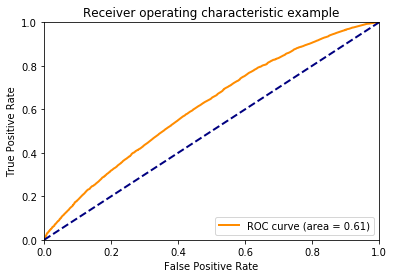

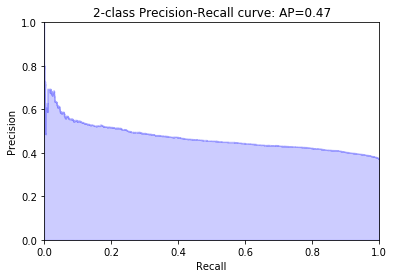

In [6]:
X = sample.drop('LABEL', axis = 1)
y = sample.LABEL

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':[200]}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=5)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.65      0.89      0.75     31415
          1       0.52      0.20      0.29     18585

avg / total       0.60      0.63      0.58     50000

confusion matrix:
[[27926  3489]
 [14854  3731]]


In [7]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/sample_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/sample_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/vali_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/vali_y.csv')

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':[200]}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=5)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fit Complete!
(50000,)
<class 'numpy.ndarray'>


NameError: name 'precision_recall_curve' is not defined

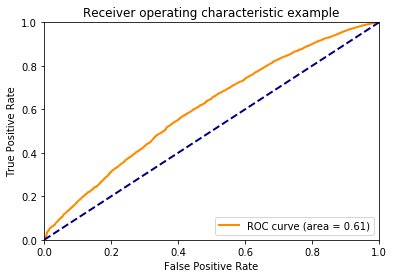

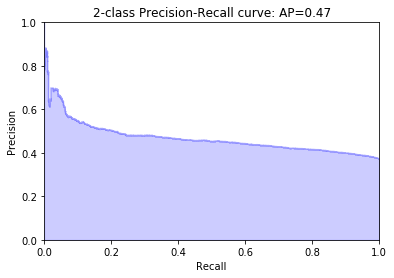

             precision    recall  f1-score   support

          0       0.64      0.92      0.76     31415
          1       0.52      0.14      0.22     18585

avg / total       0.60      0.63      0.56     50000

confusion matrix:
[[29032  2383]
 [16005  2580]]


In [9]:
precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

In [10]:
test = pd.read_csv('test_x.csv')
pred = clf.predict(test)

P = []

thre = 0.5

for i in range(0,test.shape[0]):
    if pred[i] < thre:
        P.append(0)
    else:
        P.append(1)
        
P = pd.DataFrame({'pred':P})
P.head()
P.to_csv('12_features_pre.csv', index = False,header = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fit Complete!
(50000,)
<class 'numpy.ndarray'>


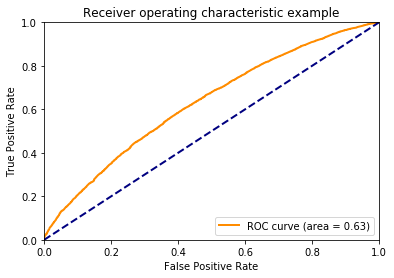

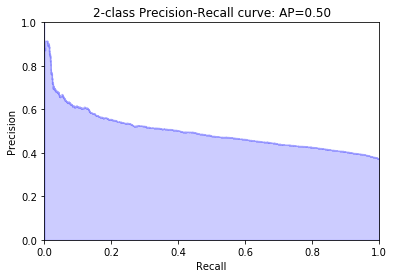

In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_train_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_local_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_local_y.csv')

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':[100,200,300,500],
                  'gradientboostingregressor__max_depth':list(range(3,10,2))}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [4]:
joblib.dump(clf,'GBDT_12_features_10k_model.pkl')

['GBDT_12_features_10k_model.pkl']

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.66      0.88      0.75     31415
          1       0.54      0.24      0.33     18585

avg / total       0.61      0.64      0.60     50000

confusion matrix:
[[27629  3786]
 [14187  4398]]


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fit Complete!
(50000,)
<class 'numpy.ndarray'>


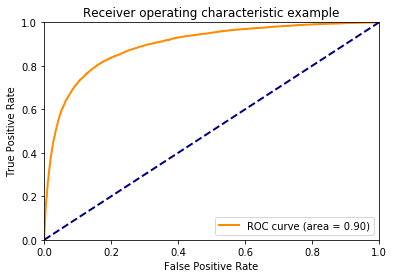

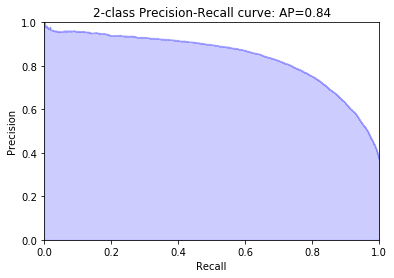

In [6]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_train_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_local_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_local_y.csv')

X = X.append(test)
y = y.append(test_y)

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':[100,200,300,500],
                  'gradientboostingregressor__max_depth':list(range(3,10,2))}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.80      0.95      0.87     31415
          1       0.87      0.59      0.71     18585

avg / total       0.83      0.82      0.81     50000

confusion matrix:
[[29804  1611]
 [ 7549 11036]]


In [8]:
joblib.dump(clf,'GBDT_12_features_60k_model.pkl')

['GBDT_12_features_60k_model.pkl']

In [23]:
train_x = []
train_y = []
for i in range(0,10):
    X = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_train_sample_x_'+str(i)+'.csv')
    y = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_train_sample_y_'+str(i)+'.csv')
    train_x.append(X)
    train_y.append(y)
    
train_x = pd.concat(train_x)
train_y = pd.concat(train_y)
train_x.to_csv('12_train_sample_x.csv', index = False, encoding = 'utf_8_sig')
train_y.to_csv('12_train_sample_y.csv', index = False, encoding = 'utf_8_sig')

In [25]:
clf = joblib.load('GBDT_12_features_10k_model.pkl')
test = pd.read_csv('C:/Users/76000/Desktop/OGeek/12_test_x.csv')
pred = clf.predict(test)
P = []
thre = 0.5
for i in range(0,test.shape[0]):
    if pred[i] < thre:
        P.append(0)
    else:
        P.append(1)
P = pd.DataFrame({'pred':P})
P.to_csv('12_features_pre_10kmodel.csv', index = False,header = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fit Complete!
(50000,)
<class 'numpy.ndarray'>


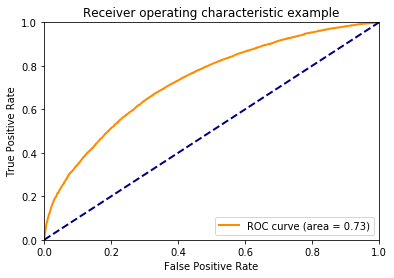

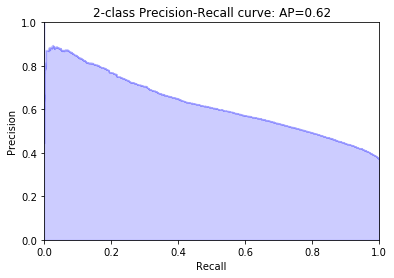

In [4]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/22_train_sample_100k_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/22_train_sample_100k_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/22_vali_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/22_vali_y.csv')

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':list(range(50,300,20)),
                  'gradientboostingregressor__max_depth':list(range(3,10,2))}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.72      0.85      0.78     31415
          1       0.63      0.44      0.52     18585

avg / total       0.68      0.69      0.68     50000

confusion matrix:
[[26638  4777]
 [10476  8109]]


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Fit Complete!
(49999,)
<class 'numpy.ndarray'>


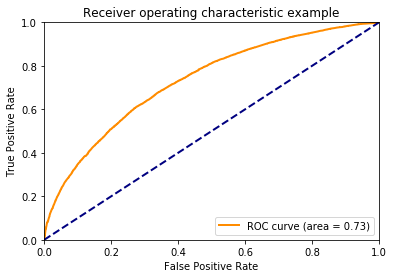

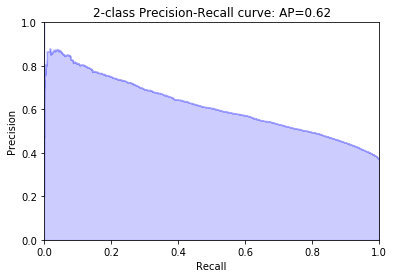

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def draw_PR_curve(recall,precision,average_precision):
    """
    绘制PR曲线
    """
    step_kwargs = ({'step':'post'}
                  if 'step' in signature(plt.fill_between).parameters
                  else {})
    plt.step(recall,precision,color = 'b',alpha = 0.2, where = 'post')

    plt.fill_between(recall,precision,alpha = 0.2, color = 'b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
def draw_ROC (r,c,AUC):
    """
    绘制ROC图像
    """
    lw = 2
    plt.plot(r, c, color='darkorange',
             lw=lw, label='ROC curve (area = {0:0.2f})'.format(AUC))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_train_sample_100k_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/22_train_sample_100k_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_vali_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_vali_y.csv')

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
 
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         GradientBoostingRegressor())
#网格搜索取最优参数组合
hyperparameters = {'gradientboostingregressor__n_estimators':list(range(50,300,50)),
                  'gradientboostingregressor__max_depth':list(range(3,10,2))}
 
clf = GridSearchCV(pipeline, hyperparameters, cv=5)

clf.fit(X_train, y_train)

pred = clf.predict(test)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)